In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
solar = pd.read_csv('solar.csv') 
solar.head(2)
solar.shape

(7956, 21)

In [3]:
solar.head()

,Unnamed: 0,state,date_installed,incentive_prog_names,size_kw,zipcode,install_type,installer,cost_per_watt,cost,...,utility_clean,tech_1,model1_clean,county,annual_PV_prod,annual_insolation,rebate,sales_tax_cost,tracking_type,reported_annual_energy_prod
0,0,TX,12/12/2013,Austin Energy,10.56,78702,residential,NaN,2.897777,30600.53,...,Austin Energy,Poly,CHSM6610P-240,Travis,14999.831600,5.157692,15000.0,1151.693704,Fixed,13836.0
1,1,TX,7/11/2014,Austin Energy,12.72,78702,residential,NaN,3.144654,40000.00,...,Austin Energy,Mono,SLA265M3A,Travis,17811.574390,5.085633,15000.0,1507.165990,Fixed,16419.0
2,2,TX,1/17/2014,Austin Energy,5.40,78702,residential,NaN,4.197330,22665.58,...,Austin Energy,Mono,PLM-300M-72,Travis,7833.742822,5.262714,7735.5,854.019783,Fixed,7235.0
3,3,TX,9/27/2012,Austin Energy,7.50,78702,residential,NaN,3.750000,28125.00,...,Austin Energy,Poly,multiple matches,Travis,10151.709590,4.920972,14550.0,1058.523673,Fixed,9340.0
4,4,TX,9/26/2012,Austin Energy,5.00,78702,residential,NaN,3.850000,19250.00,...,Austin Energy,Poly,multiple matches,Travis,7307.133789,5.304778,9600.0,724.500647,Fixed,6729.0


In [4]:
pd.options.display.max_colwidth = 130
solar_dictionary = pd.read_excel('solar_dictionary.xlsx', index_col='Column Name')
solar_dictionary

,Description
Column Name,
state,This data is from state Texas
date_installed,it represents the approximate time when installation was done
incentive_prog_names,Sources
size_kw,Size of solar panels
zipcode,Host customer zipcode
install_type,Consumer types for solar panels
installer,Companies that install solar panels
cost_per_watt,The average price per watt for solar panels
cost,The reported cost of modules.


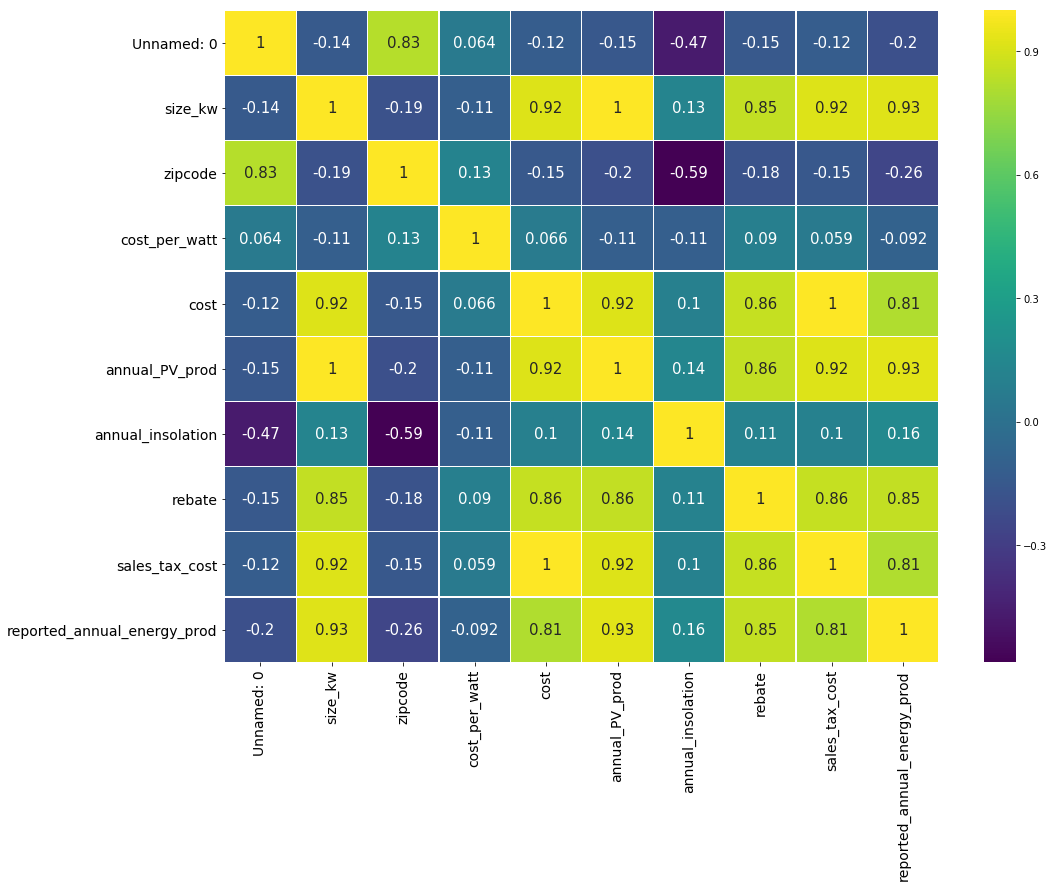

In [5]:
sns.heatmap(solar.corr(),annot=True,cmap='viridis',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(16,12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [6]:
solar.isna().sum()

Unnamed: 0                        0
state                             0
date_installed                    0
incentive_prog_names              0
size_kw                           0
zipcode                           0
install_type                      0
installer                      4675
cost_per_watt                     2
cost                              2
city                              0
utility_clean                     0
tech_1                         1153
model1_clean                   1153
county                         3252
annual_PV_prod                  251
annual_insolation               251
rebate                           51
sales_tax_cost                    2
tracking_type                  3299
reported_annual_energy_prod       0
dtype: int64

In [7]:
solar.nunique()

Unnamed: 0                     7956
state                             1
date_installed                 1819
incentive_prog_names              2
size_kw                        1082
zipcode                         138
install_type                      4
installer                        70
cost_per_watt                  5357
cost                           5564
city                              6
utility_clean                     2
tech_1                            8
model1_clean                    574
county                            3
annual_PV_prod                 4669
annual_insolation              1844
rebate                         3941
sales_tax_cost                 5960
tracking_type                     1
reported_annual_energy_prod    5351
dtype: int64

In [8]:
# col1 
solar['incentive_prog_names'].value_counts()

Austin Energy    4672
CPS Energy       3284
Name: incentive_prog_names, dtype: int64

In texas these 2 incentive programs <br/>
**Austin Energy** - If you live in Austin, you can get a rebate that ranges from $0.50 to $0.80 per Watt (W) of solar power installed on your home.<br/>
**CPS Energy** - If you’re a CPS Energy customer, you can receive up to $1.20/W of solar panels that you install on your roof.

In [11]:
# col2
solar['size_kw'].min(), solar['size_kw'].max() # amount of energy produced 
# higher size_KW more energy will be produced

(0.16, 400.0)

In [13]:
filt = solar['size_kw']==0.16
solar[filt][['cost', 'cost_per_watt', 'annual_PV_prod', 'reported_annual_energy_prod']]

,cost,cost_per_watt,annual_PV_prod,reported_annual_energy_prod
7333,1446.0,9.0375,202.553731,185.0


In [14]:
filt = solar['size_kw']==400
solar[filt][['cost', 'cost_per_watt', 'annual_PV_prod', 'reported_annual_energy_prod']]

,cost,cost_per_watt,annual_PV_prod,reported_annual_energy_prod
2090,1615756.88,4.039392,595664.2578,503220.0


#### Knowing anuual production will be like cheating. Confirm with Vivek whether removing this column will make the problem more meaningful towards a dataproduct

In [16]:
# col3
solar['install_type'].value_counts()

residential    7581
commercial      331
educational      29
government       15
Name: install_type, dtype: int64

In [18]:
# col4
solar['installer'].value_counts().head() #different companies that install solar panels

Advanced Solar & Electric    884
Cam Solar                    207
Imagine Homes                202
Freedom Solar Power          157
IES Residential              149
Name: installer, dtype: int64

In [26]:
# col5
solar['cost_per_watt'].mean()#value_counts()#.tail()

4.2783915222069275

# Question1 col6. Cost column-Not clear about cost term. Also, should this be target or annual energy production?

In [27]:
# col7
solar['utility_clean'].value_counts()

Austin Energy    4672
CPS Energy       3284
Name: utility_clean, dtype: int64

same as solar['incentive_prog_names']. Remove it?

In [32]:
print((solar['utility_clean']== solar['incentive_prog_names']).sum())
len(solar['utility_clean']== solar['incentive_prog_names'])

7956


7956

In [35]:
# col8
solar['tech_1'].value_counts().index
# different types of sillicon based solar panels

Index(['Poly', 'Mono', 'CIGS', 'crystalline', 'Mono + a-Si', 'a-Si + Micro-c',
       'multiple', 'a-Si'],
      dtype='object')

In [37]:
solar.groupby('tech_1').agg({'reported_annual_energy_prod':'mean'}) # might be a determinant

,reported_annual_energy_prod
tech_1,
CIGS,7373.808743
Mono,7646.362805
Mono + a-Si,11329.550000
Poly,8655.895408
a-Si,12071.625000
a-Si + Micro-c,6694.347826
crystalline,11926.378571
multiple,6399.562500


In [46]:
# col9
#(solar['model1_clean'].value_counts()==1).sum() - Map these into an unique category
# different types of sillicon based solar panels
solar['model1_clean'].value_counts().head()

multiple matches    1426
ET-P672300WBG        409
SPR-E20-327          125
SW270 Mono Black     120
SPR-X21-345           90
Name: model1_clean, dtype: int64

use RegEx to extract upto `-` and then see whther there is any impact

In [49]:
# col10
solar['county'].value_counts()

Travis        4620
Williamson      54
Bexar           30
Name: county, dtype: int64

Probably based on county there won't be any impact. But rebate and size of the installation and installer company etc might change

In [52]:
# col11
solar['annual_PV_prod'].value_counts().head()

8934.963867     210
10721.956640    134
2978.321289     128
13402.445800    103
1103.580220      63
Name: annual_PV_prod, dtype: int64

# Question2
This is predicted energy production while target is reported_annual_energy_prod. They are very similar. **Should I remove that?**. Prediction can be there based on size of installation etc. But it would make the problem very simple!

In [54]:
# col12
#solar['annual_insolation'].value_counts()#.head()

In [57]:
# col13
solar['rebate'].value_counts().head()

15000.00    293
13537.13    119
827.97       63
18000.00     57
1103.96      56
Name: rebate, dtype: int64

Bigger the solar energy production, bigger would be the rebate. Thats why they are highly correlated 

In [60]:
# col14
solar['sales_tax_cost'].value_counts().head()

291.649526    87
83.666358     56
111.567561    48
788.106159    47
777.697651    47
Name: sales_tax_cost, dtype: int64

In [ ]:
Sales tax generally higher with higher size installation and thus production would be higher too

In [61]:
# col15
solar['tracking_type'].value_counts()

Fixed    4657
Name: tracking_type, dtype: int64

In [67]:
# we can check what happens when it is non fixed 
solar['tracking_type'].fillna('NotFixed', inplace=True)
solar['tracking_type'].value_counts()

Fixed       4657
NotFixed    3299
Name: tracking_type, dtype: int64

In [68]:
solar.groupby('tracking_type').agg({'reported_annual_energy_prod':'mean'})

,reported_annual_energy_prod
tracking_type,
Fixed,5739.077091
NotFixed,13501.704759


In [69]:
# Interesting :)

In [70]:
# col16: Target

In [ ]:
# state, date_installed, zipcode, city - no need to explore right now